# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause an error is experienced, skip the city
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kuta
Processing Record 2 of Set 1 | fale old settlement
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | massawa
Processing Record 7 of Set 1 | vadso
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | la ronge
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | barcelos
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | cidade velha
Processing Record 18 of Set 1 | charef
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | gadzhiyevo
Processing Record 21 of Set 1 | lihue
Processing Record 22 of Set 1 | port elizabeth
Processing Re

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kuta,-8.7233,115.1723,26.80,82,39,3.39,ID,1728860082
1,fale old settlement,-9.3852,-171.2468,27.97,77,67,5.71,TK,1728860083
2,waitangi,-43.9535,-176.5597,11.08,81,96,5.55,NZ,1728860084
3,adamstown,-25.0660,-130.1015,20.97,81,100,7.24,PN,1728860085
4,iskateley,67.6803,53.1512,1.14,95,70,6.43,RU,1728860086


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kuta,-8.7233,115.1723,26.80,82,39,3.39,ID,1728860082
1,fale old settlement,-9.3852,-171.2468,27.97,77,67,5.71,TK,1728860083
2,waitangi,-43.9535,-176.5597,11.08,81,96,5.55,NZ,1728860084
3,adamstown,-25.0660,-130.1015,20.97,81,100,7.24,PN,1728860085
4,iskateley,67.6803,53.1512,1.14,95,70,6.43,RU,1728860086


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

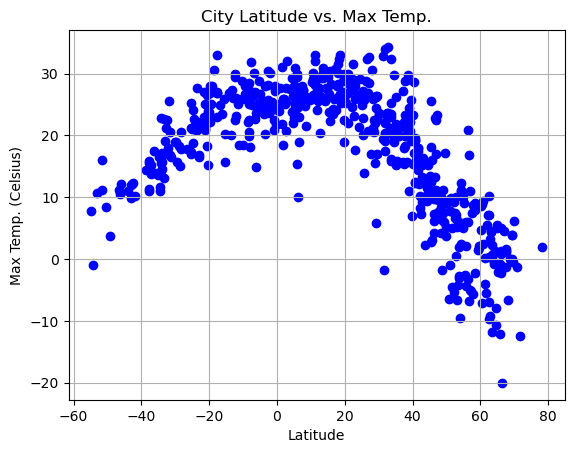

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = 'o', color = 'blue')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temp.")
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (Celsius)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

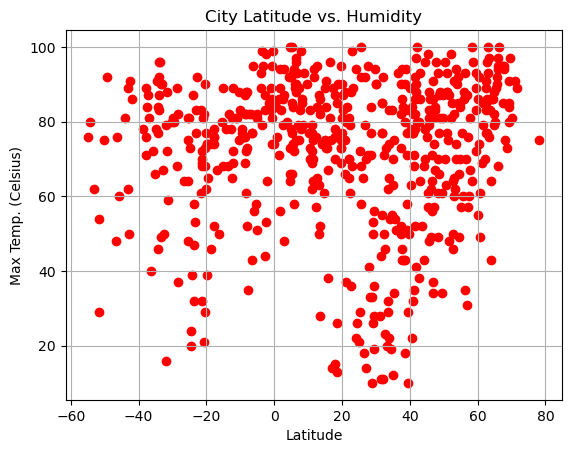

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o', color = 'red')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (Celsius)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

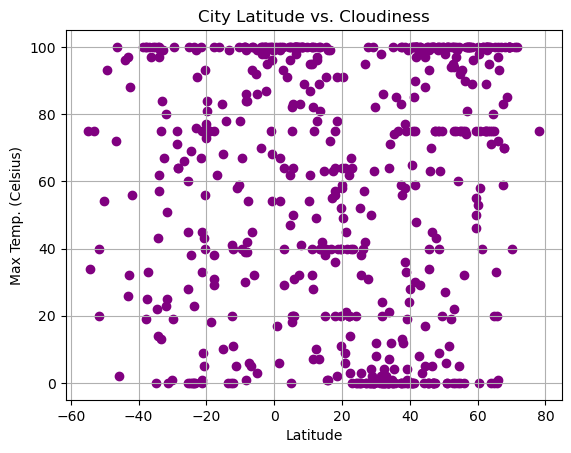

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = 'o', color = 'purple')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (Celsius)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

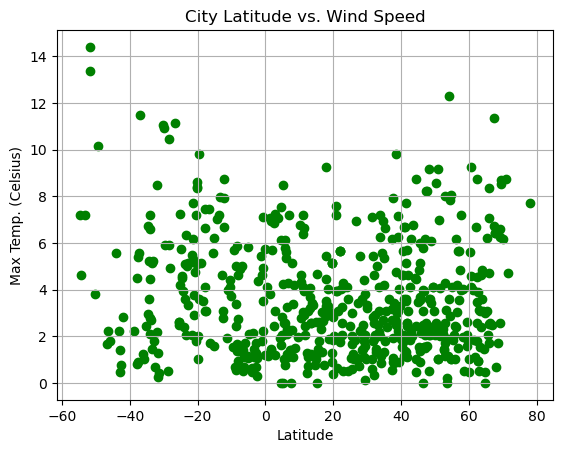

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = 'o', color = 'green')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (Celsius)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is:-0.5199264618045832


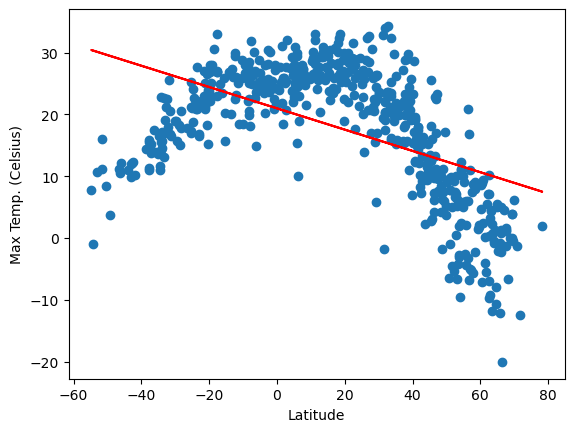

In [16]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(-40,265),color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp. (Celsius)")
print(f"The r-value is:{rvalue}")
plt.show()


The r-value is:0.020918129475293312


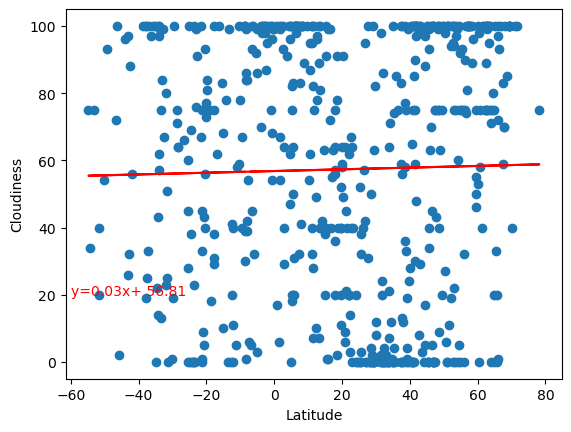

In [24]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(-60,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is:{rvalue}")
plt.show()


The r-value is:-0.10035402362447922


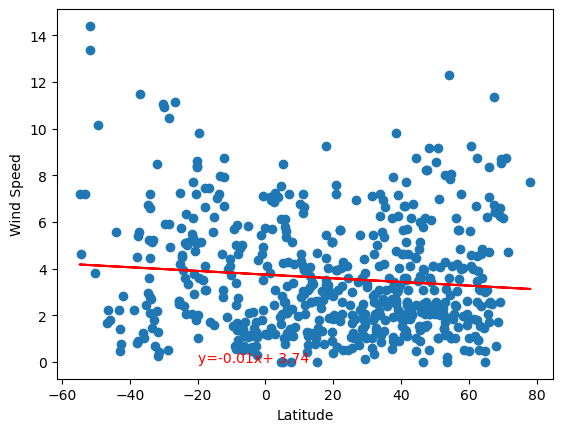

In [26]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(-20,0),color="red")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.04547832909425374


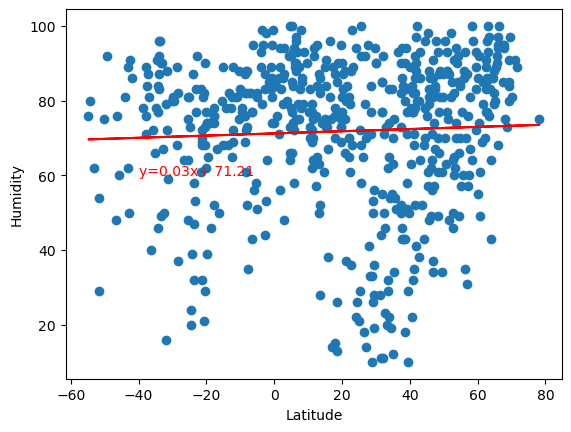

In [27]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(-40,60),color="red")
plt.xlabel("Latitude")
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,iskateley,67.6803,53.1512,1.14,95,70,6.43,RU,1728860086
5,massawa,15.6097,39.4500,30.48,73,1,1.44,ER,1728860088
6,vadso,70.0744,29.7487,6.09,81,40,6.17,NO,1728860089
9,la ronge,55.1001,-105.2842,9.14,57,75,4.12,CA,1728860092
10,yellowknife,62.4560,-114.3525,10.23,77,75,8.75,CA,1728860093


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kuta,-8.7233,115.1723,26.80,82,39,3.39,ID,1728860082
1,fale old settlement,-9.3852,-171.2468,27.97,77,67,5.71,TK,1728860083
2,waitangi,-43.9535,-176.5597,11.08,81,96,5.55,NZ,1728860084
3,adamstown,-25.0660,-130.1015,20.97,81,100,7.24,PN,1728860085
7,port-aux-francais,-49.3500,70.2167,3.73,92,93,10.16,TF,1728860090


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8373351059666462


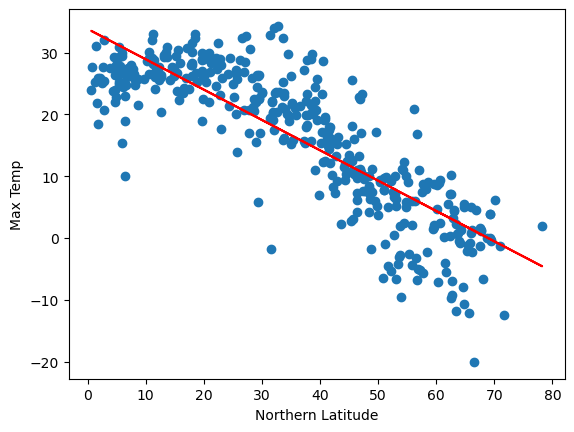

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(-5,250),color="red")
plt.xlabel("Northern Latitude")
plt.ylabel('Max Temp')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.7850382482804809


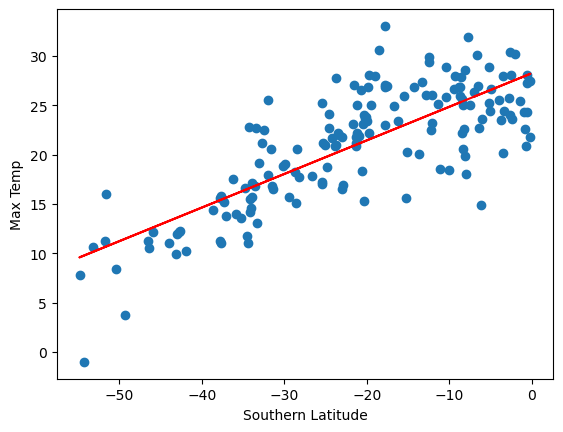

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(-55,300),color="red")
plt.xlabel("Southern Latitude")
plt.ylabel('Max Temp')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.06646854967965403


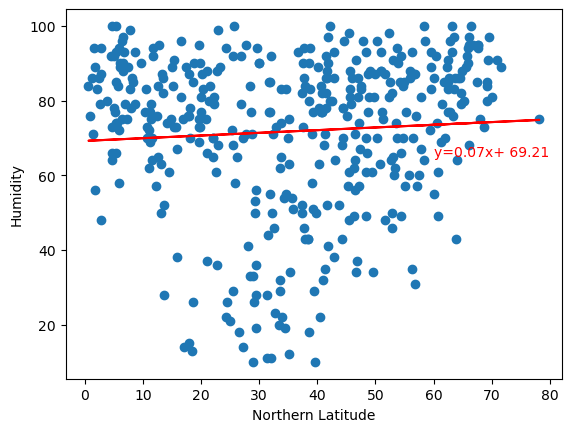

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(60,65),color="red")
plt.xlabel("Northern Latitude")
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.13312403958118738


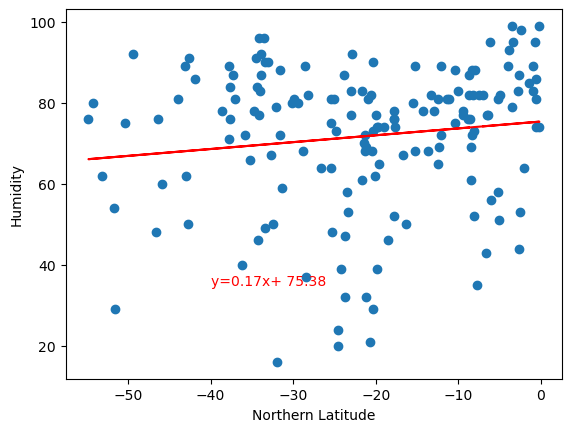

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(-40,35),color="red")
plt.xlabel("Northern Latitude")
plt.ylabel('Humidity')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.1095197169920444


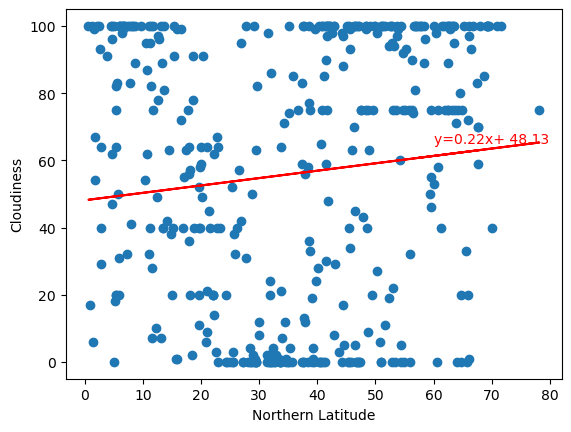

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(60,65),color="red")
plt.xlabel("Northern Latitude")
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:0.13841225664689188


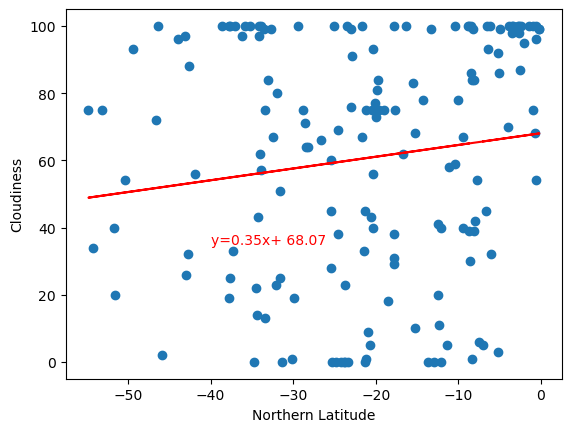

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(-40,35),color="red")
plt.xlabel("Northern Latitude")
plt.ylabel('Cloudiness')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.10382108370937809


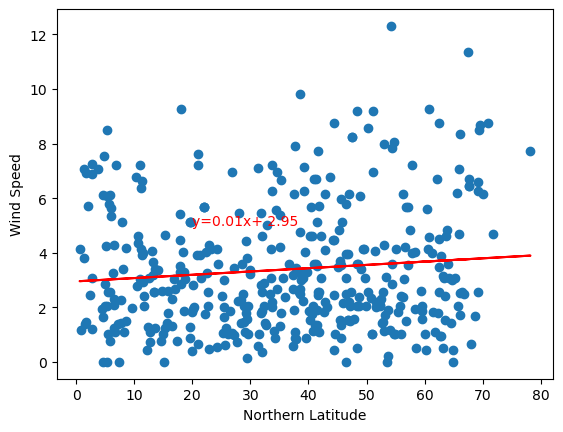

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(20,5),color="red")
plt.xlabel("Northern Latitude")
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

The r-value is:-0.24037153160034244


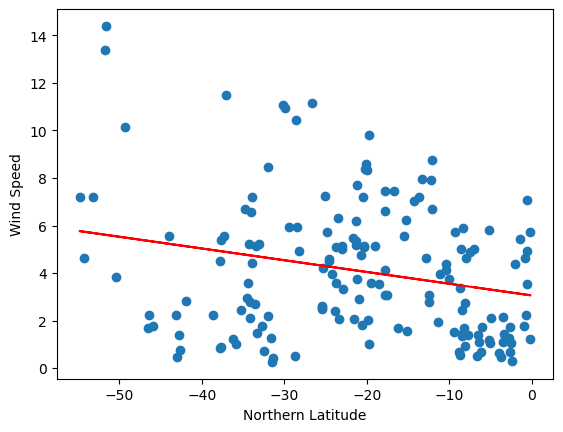

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regressing_values = x_values*slope+intercept
line_eq = "y=" + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regressing_values, "r-")
plt.annotate(line_eq,(-40,35),color="red")
plt.xlabel("Northern Latitude")
plt.ylabel('Wind Speed')
print(f"The r-value is:{rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE